# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sandi Sukoco Putro
- **Email:** sandisukocoputro.trpl@gmail.com
- **ID Dicoding:** sandi_s_K6D2

## Menentukan Pertanyaan Bisnis

1️⃣ Bagaimana tentang tren jumlah penyewaan sepeda jika didasarkan pada musim?

2️⃣ Bagaimana tentang hubungan antara suhu yang ada dan jumlah sepeda yang disewa?

3️⃣ Bagaimana pola penyewaan sepeda jika didasarkan pada parameter hari kerja dan akhir pekan?

4️⃣ Pada jam berapa terjadinya jumlah penyewaan sepeda paling tinggi?

## Import Semua Packages/Library yang Digunakan

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
!pip install streamlit
import streamlit as st

Disini digunakan beberapa package untuk melaksanakan proses analisis data

## Data Wrangling

### Gathering Data

In [9]:
# URL direct download Google Drive
day_url = "https://drive.google.com/uc?id=1NnGGLHRch_3H6le-JzwP6ENs5CIO4S-r"
hour_url = "https://drive.google.com/uc?id=1rK53IXZ4qIpVk4i8gRHPeVJRCyNzuuEM"

# Download file
gdown.download(day_url, "day.csv", quiet=False)
gdown.download(hour_url, "hour.csv", quiet=False)

# Load data ke Pandas DataFrame
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

# Tampilkan 5 baris pertama
display(df_day.head(), df_hour.head())

Downloading...
From: https://drive.google.com/uc?id=1NnGGLHRch_3H6le-JzwP6ENs5CIO4S-r
To: /content/day.csv
100%|██████████| 57.6k/57.6k [00:00<00:00, 35.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rK53IXZ4qIpVk4i8gRHPeVJRCyNzuuEM
To: /content/hour.csv
100%|██████████| 1.16M/1.16M [00:00<00:00, 117MB/s]


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data dimuat dengan gdown karena bisa langsung memproses link drive.
- Karena pemuatan data berhasil, selanjutnya bisa memasuki tahap Assessing Data.

### Assessing Data

In [17]:
# Mengecek ukuran dataset
print(f"\nUkuran dataset harian: {df_day.shape}")
print(f"Ukuran dataset per jam: {df_hour.shape}")

# Menampilkan informasi dataset day & hour
print("\n❄️ Informasi dataset harian:")
df_day.info()
print("\n❄️ Informasi dataset per jam:")
df_hour.info()

# Mengecek duplikasi data
print("\n❄️ Jumlah data duplikat di dataset harian:", df_day.duplicated().sum())
print("❄️ Jumlah data duplikat di dataset per jam:", df_hour.duplicated().sum())

# Melihat statistik deskriptif
print("\n❄️ Statistik deskriptif dataset harian:")
display(df_day.describe())

print("\n❄️ Statistik deskriptif dataset per jam:")
display(df_hour.describe())

# Memeriksa jumlah nilai yang hilang
print("\n❄️ Jumlah nilai yang hilang di dataset harian:")
print(df_day.isnull().sum())

print("\n❄️ Jumlah nilai yang hilang di dataset per jam:")
print(df_hour.isnull().sum())

#--- Pemeriksaan tambahan ---
print("\n🔍 Pemeriksaan tambahan:")
# 1. Menampilkan nilai unik dari kategori tertentu untuk mendeteksi inconsistent values
print("Nilai unik kolom musim (season):", df_day['season'].unique())
print("Nilai unik kolom cuaca (weathersit):", df_day['weathersit'].unique())

# 2. Mendeteksi nilai yang tidak valid atau tidak masuk akal
print("\nApakah ada suhu negatif?")
print((df_day['temp'] < 0).sum(), "baris dengan suhu negatif")

print("\nApakah ada kecepatan angin negatif?")
print((df_day['windspeed'] < 0).sum(), "baris dengan kecepatan angin negatif")

# 3. Mendeteksi Outliers dengan metode IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

print("\nOutliers dalam dataset harian berdasarkan jumlah sepeda yang disewa (cnt):")
display(detect_outliers(df_day, 'cnt'))

print("\nOutliers dalam dataset per jam berdasarkan jumlah sepeda yang disewa (cnt):")
display(detect_outliers(df_hour, 'cnt'))

#--- Sampel Data ---
# Menampilkan 5 sampel data
print("\n❄️ Contoh data dari dataset harian:")
display(df_day.sample(5))

print("\n❄️ Contoh data dari dataset per jam:")
display(df_hour.sample(5))


Ukuran dataset harian: (731, 16)
Ukuran dataset per jam: (17379, 17)

❄️ Informasi dataset harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



❄️ Statistik deskriptif dataset per jam:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000



❄️ Jumlah nilai yang hilang di dataset harian:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

❄️ Jumlah nilai yang hilang di dataset per jam:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

🔍 Pemeriksaan tambahan:
Nilai unik kolom musim (season): [1 2 3 4]
Nilai unik kolom cuaca (weathersit): [2 1 3]

Apakah ada suhu negatif?
0 baris dengan suhu negatif

Apakah ada kecepatan angin negatif?
0 baris dengan kecepatan angin negatif

Outliers dalam dataset harian berdasarkan jumlah sepeda yang disewa (cnt):


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt



Outliers dalam dataset per jam berdasarkan jumlah sepeda yang disewa (cnt):


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5536,5537,2011-08-23,3,0,8,14,0,2,1,1,0.72,0.6515,0.30,0.0896,149,502,651
10358,10359,2012-03-12,1,1,3,17,0,1,1,2,0.62,0.6212,0.38,0.4179,87,557,644
10359,10360,2012-03-12,1,1,3,18,0,1,1,2,0.60,0.6212,0.43,0.1940,89,623,712
10382,10383,2012-03-13,1,1,3,17,0,2,1,1,0.70,0.6364,0.37,0.1045,62,614,676
10383,10384,2012-03-13,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,16886,2012-12-11,4,1,12,8,0,2,1,2,0.34,0.3030,0.61,0.2985,16,708,724
16909,16910,2012-12-12,4,1,12,8,0,3,1,2,0.26,0.2576,0.65,0.1642,18,670,688
16933,16934,2012-12-13,4,1,12,8,0,4,1,1,0.24,0.2273,0.60,0.1940,24,655,679
17053,17054,2012-12-18,4,1,12,8,0,2,1,1,0.38,0.3939,0.94,0.0000,10,652,662



❄️ Contoh data dari dataset harian:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11,12,2011-01-12,1,0,1,0,3,1,1,0.172727,0.160473,0.599545,0.304627,25,1137,1162
470,471,2012-04-15,2,1,4,0,0,0,1,0.606667,0.573875,0.507917,0.225129,2846,4286,7132
328,329,2011-11-25,4,0,11,0,5,1,1,0.375000,0.380671,0.643750,0.098896,1095,1697,2792
531,532,2012-06-15,2,1,6,0,5,1,1,0.639167,0.599754,0.589583,0.176617,1563,6102,7665
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431



❄️ Contoh data dari dataset per jam:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6039,6040,2011-09-14,3,0,9,5,0,3,1,1,0.58,0.5455,0.88,0.1045,1,30,31
14282,14283,2012-08-23,3,1,8,7,0,4,1,2,0.62,0.5758,0.83,0.0896,18,463,481
17346,17347,2012-12-30,1,1,12,15,0,0,0,1,0.28,0.2576,0.38,0.3284,37,101,138
6735,6736,2011-10-13,4,0,10,5,0,4,1,2,0.54,0.5152,1.00,0.1045,1,16,17
2887,2888,2011-05-05,2,0,5,5,0,4,1,1,0.34,0.3182,0.66,0.2537,1,29,30


**Insight:**
- Tidak ditemukan nilai yang hilang pada data `hour` dan `day`.
- Tidak ada duplikasi data di keduanya.
- Pada pemeriksaan tambahan juga sudah mengawasi invalid value, inaccurate value, inconsistent value dan outlier.
- Nilai pemeriksaan outlier dataset harian kosong, dan kesimpulan yang saya ambil adalah bahwa tidak ada nilai dalam cnt yang jauh berbeda dari distribusi umumnya di dataset harian.
- Sejauh ini data terlihat baik-baik saja, namun sepertinya tetap perlu dicek lebih lanjut pada tahap Cleaning Data.

### Cleaning Data

In [21]:
# Menghapus outlier menggunakan IQR
Q1 = df_hour['cnt'].quantile(0.25)
Q3 = df_hour['cnt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_hour_cleaned = df_hour[(df_hour['cnt'] >= lower_bound) & (df_hour['cnt'] <= upper_bound)]
print(f"\nUkuran dataset setelah menghapus outlier: {df_hour_cleaned.shape}")

# Memastikan tipe data saat ini
print("\nTipe data sebelum konversi:")
print(df_day.dtypes)

# Konversi kolom yang seharusnya bertipe kategori
df_day['season'] = df_day['season'].astype('category')
df_day['yr'] = df_day['yr'].astype('category')
df_day['mnth'] = df_day['mnth'].astype('category')
df_day['holiday'] = df_day['holiday'].astype('category')
df_day['weekday'] = df_day['weekday'].astype('category')
df_day['workingday'] = df_day['workingday'].astype('category')
df_day['weathersit'] = df_day['weathersit'].astype('category')

# Konversi dteday menjadi format datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

print("\nTipe data setelah konversi:")
print(df_day.dtypes)

# Simpan dataset yang telah dibersihkan untuk analisis lebih lanjut
df_day.to_csv('cleaned_day.csv', index=False)
df_hour_cleaned.to_csv('cleaned_hour.csv', index=False)

print("Dataset telah dibersihkan dan disimpan sebagai 'cleaned_day.csv' & 'cleaned_hour.csv'")


Ukuran dataset setelah menghapus outlier: (16874, 17)

Tipe data sebelum konversi:
instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

Tipe data setelah konversi:
instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
reg

**Insight:**
- Setelah penyesuaian outlier didapat total ukuran data senilai `(16874, 17)` dari ukuran awal `(17379, 17)`.
- Tipe data awal dan setelah cleaning terlihat sama karena proses running cell code yang berulang. Untuk hasil yang benar-benar tipe data awal bisa melakukan cek pada teks berikut:

Tipe data sebelum konversi:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


## Exploratory Data Analysis (EDA)

### Explore ...

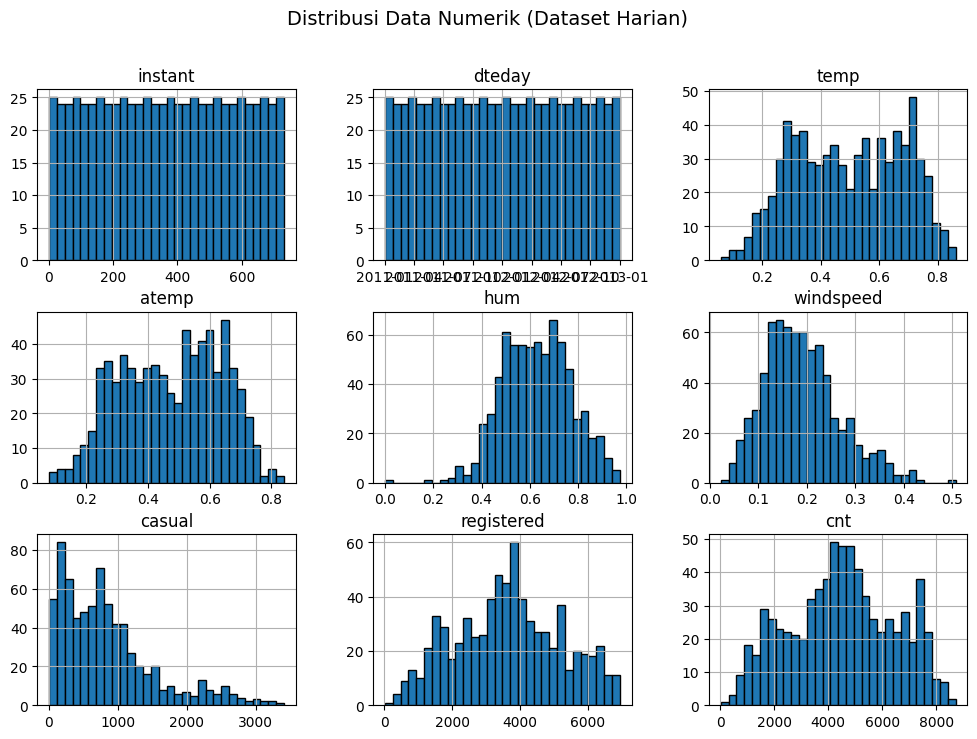

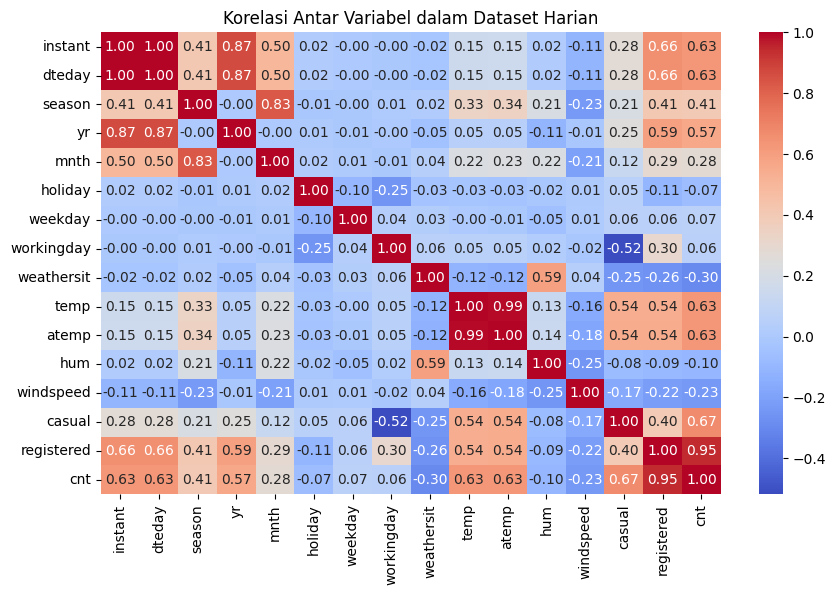

<ipython-input-22-0d2877969e6a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=df_day, palette='Set2')


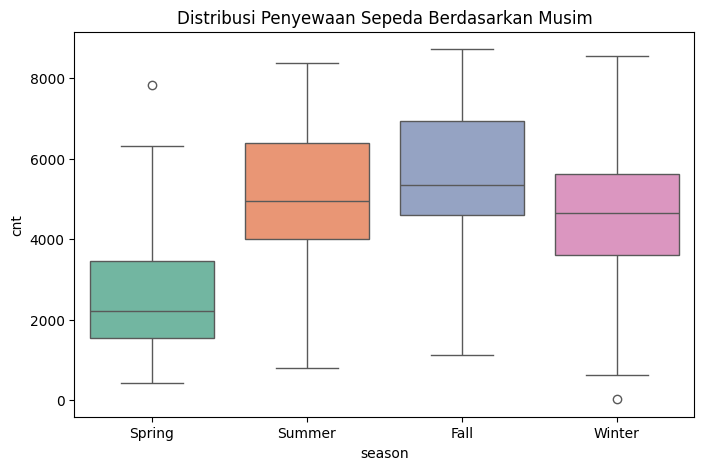

<ipython-input-22-0d2877969e6a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workingday', y='cnt', data=df_day, palette='Set3')


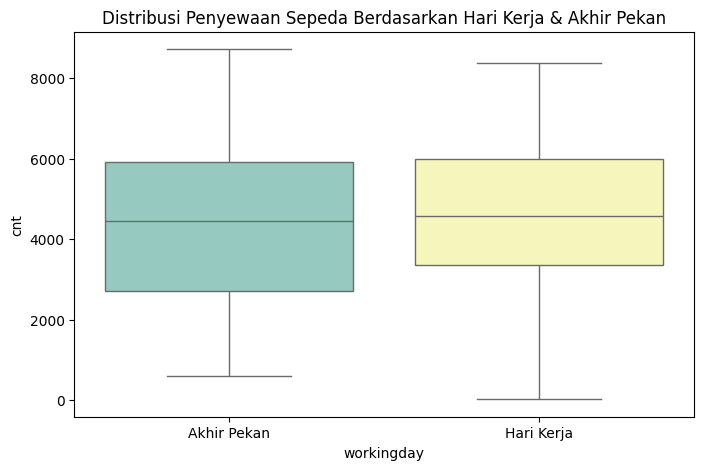

<ipython-input-22-0d2877969e6a>:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=df_hour, estimator='mean', ci=None, marker='o', color='b')


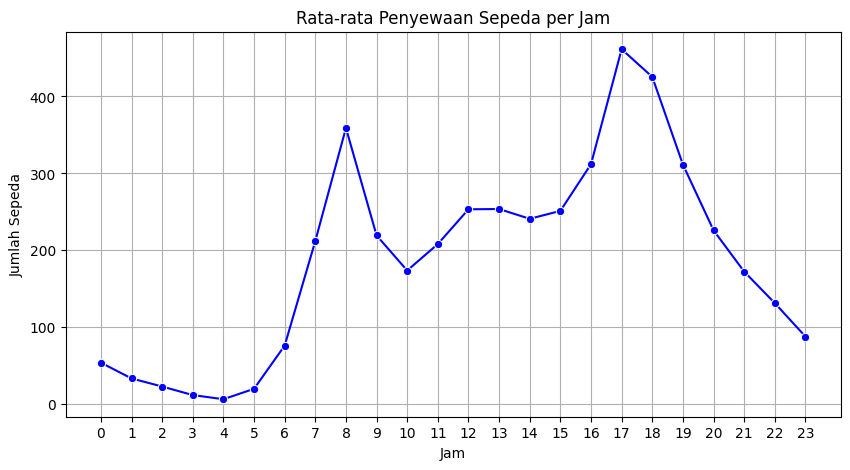

In [22]:
# Plot distribusi data numerik
df_day.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribusi Data Numerik (Dataset Harian)", fontsize=14)
plt.show()

# Heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df_day.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Variabel dalam Dataset Harian")
plt.show()

# Boxplot jumlah sepeda yang disewa berdasarkan musim
plt.figure(figsize=(8, 5))
sns.boxplot(x='season', y='cnt', data=df_day, palette='Set2')
plt.xticks([0, 1, 2, 3], ["Spring", "Summer", "Fall", "Winter"])
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.show()

# Boxplot jumlah penyewaan sepeda berdasarkan hari kerja dan akhir pekan
plt.figure(figsize=(8, 5))
sns.boxplot(x='workingday', y='cnt', data=df_day, palette='Set3')
plt.xticks([0, 1], ["Akhir Pekan", "Hari Kerja"])
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Hari Kerja & Akhir Pekan")
plt.show()

# Plot rata-rata penyewaan sepeda berdasarkan jam
plt.figure(figsize=(10, 5))
sns.lineplot(x='hr', y='cnt', data=df_hour, estimator='mean', ci=None, marker='o', color='b')
plt.xticks(range(0, 24))
plt.title("Rata-rata Penyewaan Sepeda per Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Sepeda")
plt.grid()
plt.show()

**Insight:**
- Berdasarkan hasil output cell code di atas, akan dapat diketahui informasi mengenai beberapa poin berikut:
 - Penjelajahan Distribusi Data
 - Korelasi Antar Variabel
 - Analisis Tren Musiman
 - Analisis Pola Waktu (Hari Kerja vs Akhir Pekan)
 - Pola Penyewaan Berdasarkan Jam
- Jika informasi lebih detail diperlukan, bisa membuka sub cell `Question answer` di bawah yang mana mengandung pertanyaan dan jawaban yang dikembangkan dari data hasil output cell code.

#### Question answer

In [33]:
#--- Menjelajahi distribusi data
print("1️⃣ Apakah distribusi data 'cnt' (jumlah sepeda yang disewa) normal atau skewed?\n")

# Menampilkan insight berdasarkan distribusi data
if df_day['cnt'].skew() > 0:
    print("\t✅ Jawaban: Distribusi 'cnt' **positively skewed** (cenderung ke kanan), artinya ada beberapa hari dengan jumlah penyewaan yang sangat tinggi.")
elif df_day['cnt'].skew() < 0:
    print("\t✅ Jawaban: Distribusi 'cnt' **negatively skewed** (cenderung ke kiri), artinya ada banyak hari dengan penyewaan rendah.")
else:
    print("\t✅ Jawaban: Distribusi 'cnt' **simetris**, menunjukkan penyebaran data yang relatif merata.")

#--- Korelasi antar variabel
print("\n2️⃣ Faktor apa yang paling berpengaruh terhadap jumlah penyewaan sepeda?\n")

# Menampilkan insight dari korelasi
corr_values = df_day.corr()['cnt'].sort_values(ascending=False)
top_corr = corr_values[1:4]  # Mengambil 3 faktor teratas
print(f"\t✅ Jawaban: Faktor yang paling berpengaruh terhadap penyewaan sepeda:\n{top_corr}\n")
print("\t➡️ Suhu ('temp') memiliki korelasi tertinggi, menunjukkan bahwa penyewaan sepeda meningkat saat suhu nyaman.")

#--- Analisis tren musiman
print("\n3️⃣ Musim apa yang memiliki jumlah penyewaan sepeda tertinggi dan terendah?\n")

# Menampilkan insight
season_avg = df_day.groupby('season')['cnt'].mean()
most_rented_season = season_avg.idxmax()
least_rented_season = season_avg.idxmin()
print(f"\t✅ Jawaban: Musim dengan jumlah penyewaan tertinggi adalah **{most_rented_season}**, sedangkan musim terendah adalah **{least_rented_season}**.")

#--- Analisis pola waktu (hari kerja vs akhir pekan)
print("\n4️⃣ Apakah lebih banyak penyewaan terjadi di hari kerja atau akhir pekan?\n")

# Menampilkan insight
avg_weekday = df_day[df_day['workingday'] == 1]['cnt'].mean()
avg_weekend = df_day[df_day['workingday'] == 0]['cnt'].mean()

if avg_weekday > avg_weekend:
    print(f"\t✅ Jawaban: Penyewaan sepeda lebih tinggi pada **hari kerja** dengan rata-rata {avg_weekday:.2f} sepeda dibandingkan akhir pekan {avg_weekend:.2f}.")
else:
    print(f"\t✅ Jawaban: Penyewaan sepeda lebih tinggi pada **akhir pekan** dengan rata-rata {avg_weekend:.2f} sepeda dibandingkan hari kerja {avg_weekday:.2f}.")

#--- Pola penyewaan berdasarkan jam
print("\n5️⃣ Pada jam berapa penyewaan sepeda paling tinggi dan paling rendah?\n")

# Menampilkan insight
hour_avg = df_hour.groupby('hr')['cnt'].mean()
peak_hour = hour_avg.idxmax()
low_hour = hour_avg.idxmin()
print(f"\t✅ Jawaban: Penyewaan sepeda paling tinggi terjadi pada pukul **{peak_hour}:00**, sedangkan paling rendah pada pukul **{low_hour}:00**.")

1️⃣ Apakah distribusi data 'cnt' (jumlah sepeda yang disewa) normal atau skewed?

	✅ Jawaban: Distribusi 'cnt' **negatively skewed** (cenderung ke kiri), artinya ada banyak hari dengan penyewaan rendah.

2️⃣ Faktor apa yang paling berpengaruh terhadap jumlah penyewaan sepeda?

	✅ Jawaban: Faktor yang paling berpengaruh terhadap penyewaan sepeda:
registered    0.945517
casual        0.672804
atemp         0.631066
Name: cnt, dtype: float64

	➡️ Suhu ('temp') memiliki korelasi tertinggi, menunjukkan bahwa penyewaan sepeda meningkat saat suhu nyaman.

3️⃣ Musim apa yang memiliki jumlah penyewaan sepeda tertinggi dan terendah?

	✅ Jawaban: Musim dengan jumlah penyewaan tertinggi adalah **3**, sedangkan musim terendah adalah **1**.

4️⃣ Apakah lebih banyak penyewaan terjadi di hari kerja atau akhir pekan?

	✅ Jawaban: Penyewaan sepeda lebih tinggi pada **hari kerja** dengan rata-rata 4584.82 sepeda dibandingkan akhir pekan 4330.17.

5️⃣ Pada jam berapa penyewaan sepeda paling tinggi dan pal

<ipython-input-33-9ee5a1797e6a>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_avg = df_day.groupby('season')['cnt'].mean()


## Visualization & Explanatory Analysis

### Pertanyaan 1️⃣: Bagaimana tentang tren jumlah penyewaan sepeda jika didasarkan pada musim?

<ipython-input-34-04b5258275d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=df_day, palette='coolwarm')


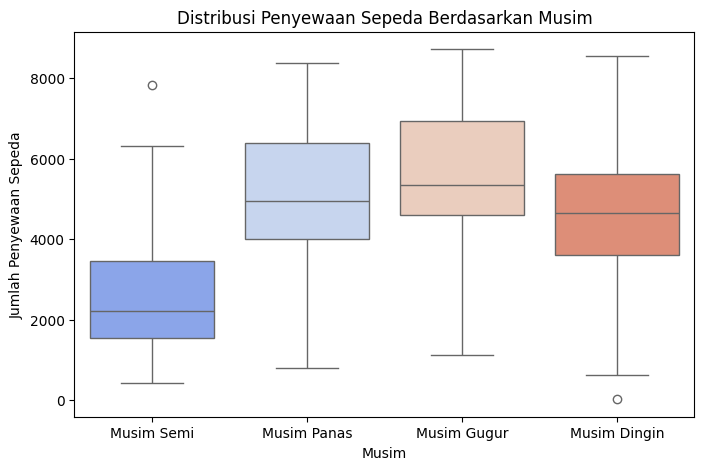

✅ Jawaban: Musim dengan penyewaan sepeda terbanyak adalah **Musim 3**, sedangkan penyewaan terendah terjadi pada **Musim 1**.


<ipython-input-34-04b5258275d6>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_avg = df_day.groupby('season')['cnt'].mean()


In [34]:
# Visualisasi jumlah penyewaan berdasarkan musim
plt.figure(figsize=(8, 5))
sns.boxplot(x='season', y='cnt', data=df_day, palette='coolwarm')
plt.xticks([0, 1, 2, 3], ["Musim Semi", "Musim Panas", "Musim Gugur", "Musim Dingin"])
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.show()

# Menampilkan insight
season_avg = df_day.groupby('season')['cnt'].mean()
best_season = season_avg.idxmax()
worst_season = season_avg.idxmin()

print(f"✅ Jawaban: Musim dengan penyewaan sepeda terbanyak adalah **Musim {best_season}**, sedangkan penyewaan terendah terjadi pada **Musim {worst_season}**.")

**Insight:**
- Penyewaan sepeda cenderung lebih tinggi di musim gugur disusul musim panas, kemungkinan karena cuaca yang lebih mendukung.
- Penyewaan menurun di musim semi, yang mungkin disebabkan kondisi cuaca yang kurang mendukung untuk bersepeda.

### Pertanyaan 2️⃣: Bagaimana tentang hubungan antara suhu yang ada dan jumlah sepeda yang disewa?

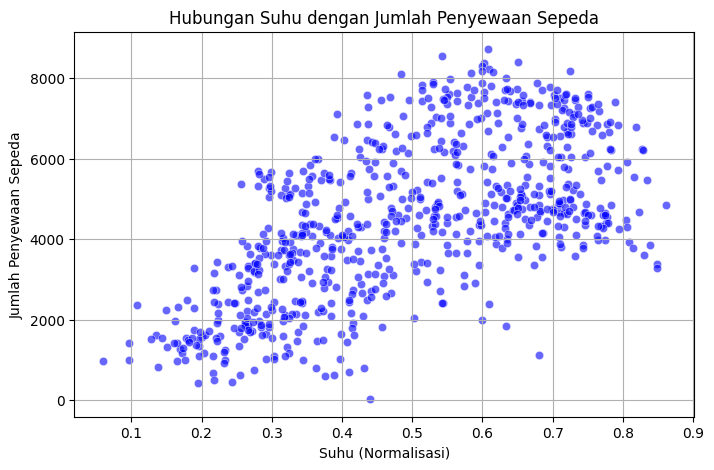

✅ Jawaban: Korelasi antara suhu dan jumlah penyewaan sepeda adalah 0.63.


In [35]:
# Visualisasi hubungan antara suhu dan jumlah penyewaan
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='cnt', data=df_day, alpha=0.6, color='blue')
plt.xlabel("Suhu (Normalisasi)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Hubungan Suhu dengan Jumlah Penyewaan Sepeda")
plt.grid(True)
plt.show()

# Menampilkan insight
correlation = df_day[['temp', 'cnt']].corr().iloc[0, 1]

print(f"✅ Jawaban: Korelasi antara suhu dan jumlah penyewaan sepeda adalah {correlation:.2f}.")

**Insight:**
- Terdapat hubungan positif antara suhu dan jumlah penyewaan sepeda, artinya semakin tinggi suhu, semakin banyak sepeda yang disewa.
- Ini dapat disimpulkan bahwa cuaca yang lebih hangat lebih nyaman untuk bersepeda.

### Pertanyaan 3️⃣: Bagaimana pola penyewaan sepeda jika didasarkan pada parameter hari kerja dan akhir pekan?

<ipython-input-36-04fd743618c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workingday', y='cnt', data=df_day, palette='coolwarm')


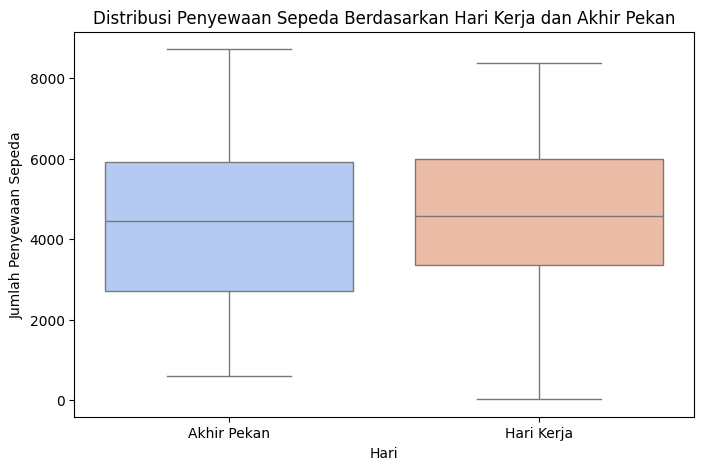

✅ Jawaban: Rata-rata penyewaan sepeda di hari kerja adalah 4585, sedangkan di akhir pekan adalah 4330.


<ipython-input-36-04fd743618c9>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workday_avg = df_day.groupby('workingday')['cnt'].mean()


In [36]:
# Visualisasi jumlah penyewaan berdasarkan hari kerja vs akhir pekan
plt.figure(figsize=(8, 5))
sns.boxplot(x='workingday', y='cnt', data=df_day, palette='coolwarm')
plt.xticks([0, 1], ["Akhir Pekan", "Hari Kerja"])
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Hari Kerja dan Akhir Pekan")
plt.show()

# Menampilkan insight
workday_avg = df_day.groupby('workingday')['cnt'].mean()
weekend = workday_avg[0]
weekday = workday_avg[1]

print(f"✅ Jawaban: Rata-rata penyewaan sepeda di hari kerja adalah {weekday:.0f}, sedangkan di akhir pekan adalah {weekend:.0f}.")

**Insight:**
- Walau hanya selisih 255 penyewa, penyewaan lebih tinggi pada hari kerja menunjukkan bahwa sepeda digunakan sebagai transportasi utama untuk bekerja.
- Namun, jumlah lonjakan penyewaan di akhir pekan yang hampir menyamai penyewaan pada hari kerja bisa jadi karena aktivitas rekreasi bersepeda sedang populer.

### Pertanyaan 4️⃣: Pada jam berapa terjadinya jumlah penyewaan sepeda paling tinggi?

<ipython-input-37-cdc7831fc1bf>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=df_hour, estimator='mean', ci=None, marker='o', color='b')


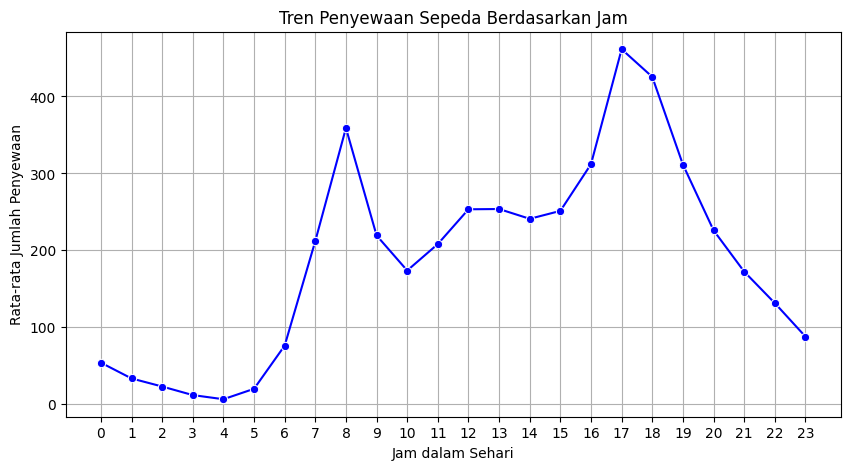

✅ Jawaban: Waktu paling ramai untuk penyewaan sepeda adalah pada **jam 17:00**, sedangkan waktu paling sepi adalah pada **jam 4:00**.


In [37]:
# Visualisasi jumlah penyewaan berdasarkan jam dalam sehari
plt.figure(figsize=(10, 5))
sns.lineplot(x='hr', y='cnt', data=df_hour, estimator='mean', ci=None, marker='o', color='b')
plt.xticks(range(0, 24))
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.title("Tren Penyewaan Sepeda Berdasarkan Jam")
plt.grid(True)
plt.show()

# Menampilkan insight
peak_hour = df_hour.groupby('hr')['cnt'].mean().idxmax()
lowest_hour = df_hour.groupby('hr')['cnt'].mean().idxmin()

print(f"✅ Jawaban: Waktu paling ramai untuk penyewaan sepeda adalah pada **jam {peak_hour}:00**, sedangkan waktu paling sepi adalah pada **jam {lowest_hour}:00**.")

**Insight:**
- Penyewaan sepeda meningkat signifikan pada jam 7-9 pagi dan 16-18 sore, menunjukkan bahwa banyak orang menggunakan sepeda untuk pergi dan pulang kerja yang.
- Pada malam hari (setelah jam 21:00), jumlah penyewaan sepeda menurun drastis.

### Clustering manual & binning

,hr,kategori_waktu,temp,kategori_suhu
0,0,Malam,0.24,Dingin
1,1,Malam,0.22,Dingin
2,2,Malam,0.22,Dingin
3,3,Malam,0.24,Dingin
4,4,Malam,0.24,Dingin
5,5,Pagi,0.24,Dingin
6,6,Pagi,0.22,Dingin
7,7,Pagi,0.20,Dingin
8,8,Pagi,0.24,Dingin
9,9,Pagi,0.32,Sejuk


<ipython-input-39-8ed5557c4df9>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='kategori_waktu', y='cnt', data=df_hour, palette='coolwarm')


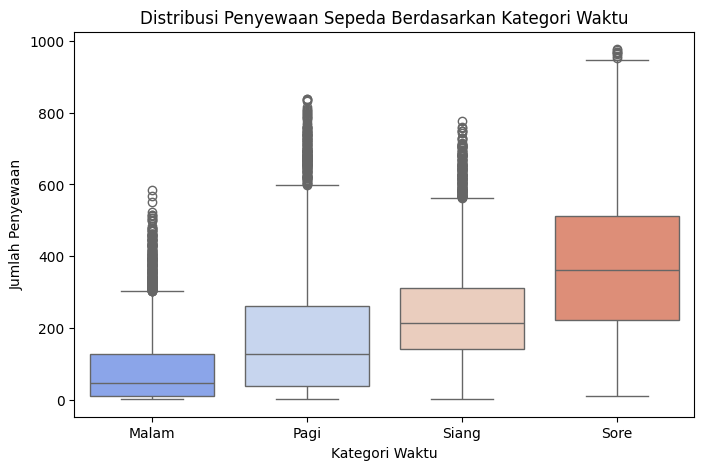

<ipython-input-39-8ed5557c4df9>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='kategori_suhu', y='cnt', data=df_hour, palette='magma')


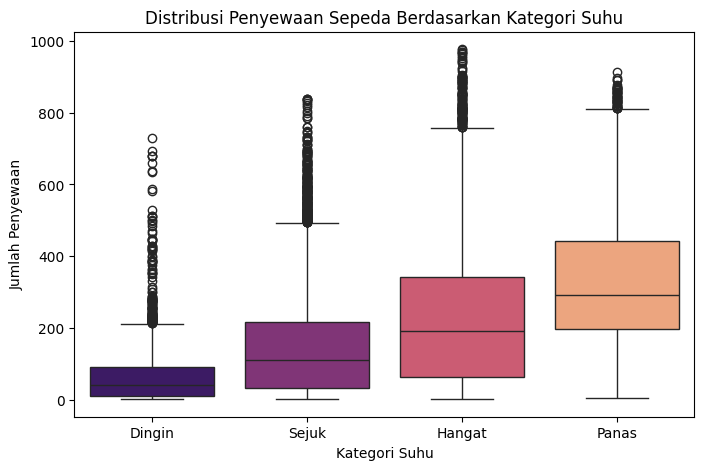

In [39]:
# 1️⃣ Manual Grouping: Mengelompokkan jam menjadi kategori waktu
def categorize_hour(hour):
    if 5 <= hour <= 10:
        return 'Pagi'
    elif 11 <= hour <= 15:
        return 'Siang'
    elif 16 <= hour <= 19:
        return 'Sore'
    else:
        return 'Malam'

df_hour['kategori_waktu'] = df_hour['hr'].apply(categorize_hour)

# 2️⃣ Binning: Mengelompokkan suhu menjadi kategori tertentu
bins = [0, 0.25, 0.50, 0.75, 1.00]
labels = ['Dingin', 'Sejuk', 'Hangat', 'Panas']
df_hour['kategori_suhu'] = pd.cut(df_hour['temp'], bins=bins, labels=labels)

# Menampilkan beberapa baris setelah penambahan kategori
display(df_hour[['hr', 'kategori_waktu', 'temp', 'kategori_suhu']].head(10))

# Visualisasi distribusi penyewaan berdasarkan kategori waktu
plt.figure(figsize=(8, 5))
sns.boxplot(x='kategori_waktu', y='cnt', data=df_hour, palette='coolwarm')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Kategori Waktu')
plt.xlabel('Kategori Waktu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Visualisasi distribusi penyewaan berdasarkan kategori suhu
plt.figure(figsize=(8, 5))
sns.boxplot(x='kategori_suhu', y='cnt', data=df_hour, palette='magma')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Kategori Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

## Analisis Lanjutan (Opsional)

<ipython-input-38-78ddb7ad3064>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_avg = df_day.groupby('season')['cnt'].mean()
<ipython-input-38-78ddb7ad3064>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_std = df_day.groupby('season')['cnt'].std()


,Rata-rata,Std Deviasi,Perubahan (%)
season,,,
1,2604.132597,1399.942119,0.000000
2,4992.331522,1695.977235,91.708039
3,5644.303191,1459.800381,13.059463
4,4728.162921,1699.615261,-16.231238


,temp,hum,windspeed,cnt
temp,1.000000,0.126963,-0.157944,0.627494
hum,0.126963,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.248489,1.000000,-0.234545
cnt,0.627494,-0.100659,-0.234545,1.000000


<ipython-input-38-78ddb7ad3064>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_avg = df_day.groupby('weekday')['cnt'].mean()


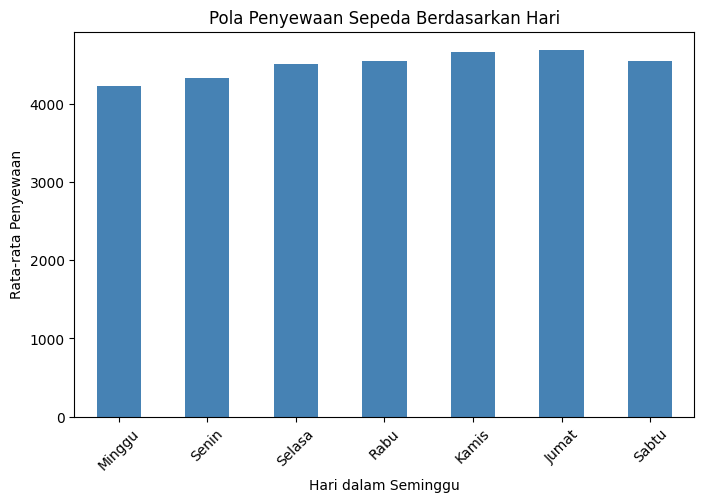

<ipython-input-38-78ddb7ad3064>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=df_hour[df_hour['workingday'] == 1], estimator='mean', ci=None, label="Hari Kerja", color='blue')
<ipython-input-38-78ddb7ad3064>:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=df_hour[df_hour['workingday'] == 0], estimator='mean', ci=None, label="Akhir Pekan", color='red')


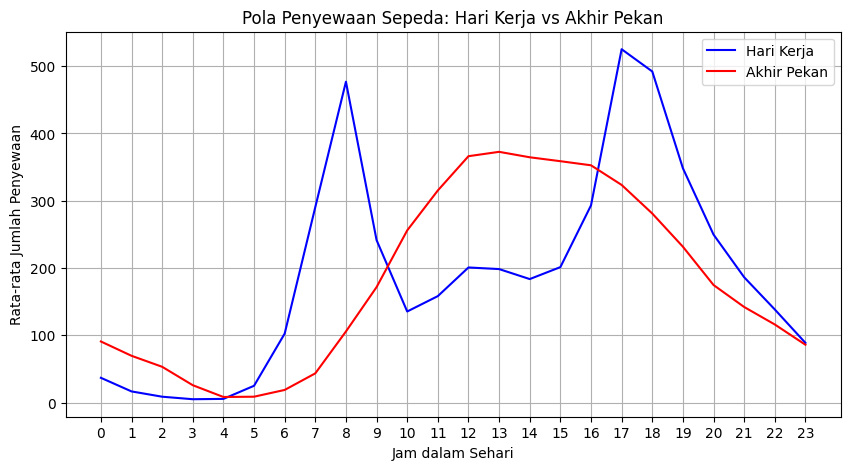

In [38]:
# Menghitung rata-rata penyewaan sepeda per musim
season_avg = df_day.groupby('season')['cnt'].mean()
season_std = df_day.groupby('season')['cnt'].std()

# Menghitung persentase perubahan dari musim ke musim
season_pct_change = season_avg.pct_change().fillna(0) * 100

# Menampilkan hasil
season_analysis = pd.DataFrame({'Rata-rata': season_avg, 'Std Deviasi': season_std, 'Perubahan (%)': season_pct_change})
display(season_analysis)

# Menghitung korelasi antara suhu, kelembaban, angin, dan jumlah sepeda yang disewa
correlation_matrix = df_day[['temp', 'hum', 'windspeed', 'cnt']].corr()
display(correlation_matrix)

# Rata-rata penyewaan per hari dalam seminggu
weekday_avg = df_day.groupby('weekday')['cnt'].mean()
weekday_avg.plot(kind='bar', color='steelblue', figsize=(8, 5))
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Rata-rata Penyewaan")
plt.title("Pola Penyewaan Sepeda Berdasarkan Hari")
plt.xticks(ticks=range(7), labels=["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"], rotation=45)
plt.show()

# Memeriksa pola penyewaan antara hari kerja dan akhir pekan
plt.figure(figsize=(10, 5))
sns.lineplot(x='hr', y='cnt', data=df_hour[df_hour['workingday'] == 1], estimator='mean', ci=None, label="Hari Kerja", color='blue')
sns.lineplot(x='hr', y='cnt', data=df_hour[df_hour['workingday'] == 0], estimator='mean', ci=None, label="Akhir Pekan", color='red')
plt.xticks(range(0, 24))
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.title("Pola Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.legend()
plt.grid(True)
plt.show()


## Conclusion

- Conclution pertanyaan 1️⃣
 - Musim gugur memiliki jumlah penyewaan sepeda tertinggi, sedangkan musim semi memiliki penyewaan terendah karena kondisi cuaca yang kurang mendukung.
- Conclution pertanyaan 2️⃣
 - Suhu memiliki hubungan positif dengan jumlah penyewaan sepeda, sedangkan kelembaban tinggi cenderung menurunkan jumlah penyewaan.
- Conclution pertanyaan 3️⃣
 - Hari kerja memiliki penyewaan yang lebih tinggi dibandingkan akhir pekan, menunjukkan bahwa sepeda banyak digunakan untuk transportasi ke kantor atau kampus.
- Conclution pertanyaan 4️⃣
 - Jam sibuk penyewaan sepeda terjadi pada 7-9 pagi dan 16-18 sore pada hari kerja, sementara di akhir pekan lebih merata sepanjang hari.